<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211104_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09-3 2개층을 연결하기

In [16]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target= train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq= pad_sequences(train_input, maxlen=100)
val_seq= pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 100, 8)            800       
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best-2lstm-model.h5', save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model.fit(train_seq, train_target, epochs=100, batch_size=64, 
          validation_data=(val_seq, val_target), callbacks=[checkpoint, early_stopping])

Epoch 1/100
313/313 [==============================] - 30s 82ms/step - loss: 0.6928 - accuracy: 0.5227 - val_loss: 0.6924 - val_accuracy: 0.5602
Epoch 2/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6911 - accuracy: 0.5813 - val_loss: 0.6891 - val_accuracy: 0.6288
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6833 - accuracy: 0.6302 - val_loss: 0.6745 - val_accuracy: 0.6388
Epoch 4/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6453 - accuracy: 0.6611 - val_loss: 0.6095 - val_accuracy: 0.6924
Epoch 5/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5774 - accuracy: 0.7138 - val_loss: 0.5579 - val_accuracy: 0.7232
Epoch 6/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5452 - accuracy: 0.7372 - val_loss: 0.5355 - val_accuracy: 0.7400
Epoch 7/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5262 - accuracy: 0.7506 - val_loss: 0.5177 - val_ac

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best-gru-model.h5', best_save_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq,val_target), callbacks=[checkpoint, early_stopping])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6926 - accuracy: 0.5150 - val_loss: 0.6919 - val_accuracy: 0.5282
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6902 - accuracy: 0.5680 - val_loss: 0.6893 - val_accuracy: 0.5794
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6860 - accuracy: 0.6107 - val_loss: 0.6844 - val_accuracy: 0.6034
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6784 - accuracy: 0.6309 - val_loss: 0.6750 - val_accuracy: 0.6204
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6649 - accuracy: 0.6486 - val_loss: 0.6587 - val_accuracy: 0.6392
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6405 - accuracy: 0.6681 - val_loss: 0.6278 - val_accuracy: 0.6746
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5925 - accuracy: 0.6991 - val_loss: 0.5662 - val_ac

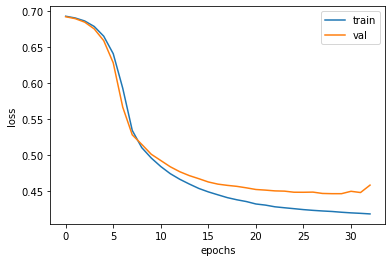

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [17]:

test_seq=pad_sequences(test_input, maxlen=100)
rnn_model= keras.models.load_model('best-2lstm-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 11s 13ms/step - loss: 0.4307 - accuracy: 0.7999


[0.4306689202785492, 0.7998800277709961]

In [18]:
gru_model= keras.models.load_model('best-gru-model.h5')
gru_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4518 - accuracy: 0.7924


[0.4518490135669708, 0.7923600077629089]